### ML for Flask

In [2]:
import pickle
import pandas as pd
import numpy as np
xgb_model_min_loaded = pickle.load(open('ny_min_xgb_model_min.pickle', "rb"))
xgb_model_max_loaded = pickle.load(open('ny_max_xgb_model_min.pickle', "rb"))


sel_features = ['rating','.Net', 'AI', 'AWS', 'Azure', 'Big Data', 'Business Intelligence',
                'C/C++', 'Data Analysis', 'Data Science', 'Data Warehouse', 'Excel',
                'Git', 'HBase', 'Hadoop', 'Hive', 'Java', 'JavaScript', 'Kafka',
                'Linux', 'MATLAB', 'Machine Learning', 'Microsoft Office',
                'Microsoft SQL Server', 'MongoDB', 'MySQL', 'Natural Language Processing',
                'NoSQL', 'Oracle', 'Perl', 'Pig', 'PostgreSQL', 'Project Management',
                'Python', 'R', 'S3', 'SAS', 'SPSS', 'SQL', 'Scala', 'Scripting',
                'Shell Scripting', 'Software Development', 'Spark', 'Tableau', 'TensorFlow']

def nyc_salary_with_skills(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = (int(xgb_model_min_loaded.predict(input_X[:1])), int(xgb_model_max_loaded.predict(input_X[:1])))
    return salary

In [3]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['salary'] = nyc_salary_with_skills(3.6, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill = pd.DataFrame(skill_money_list).sort_values('salary', ascending=False)

In [4]:
def nyc_salary_with_skills_and(rating, inputs_list):

    sample_list = [0] * (len(sel_features))
    input_x = pd.DataFrame([sample_list],
                           columns=list(sel_features))

    for inputs in inputs_list:
        if inputs in list(input_x.columns):
            input_x[inputs] = 1
    input_x['rating'] = float(rating)
    salary_min = int(xgb_model_min_loaded.predict(input_x))
    salary_max = int(xgb_model_max_loaded.predict(input_x))

    # suggest skill with more salary
    suggest_list = []
    all_list = inputs_list

    for skill in single_skill['skill'][:10]:
        if skill not in inputs_list:
            suggest_list.append(skill)

        suggest_list_salary = {}
        suggest_list_salary_list = []
        for skill in suggest_list:
            all_list = []
            all_list = inputs_list + [skill]
            suggest_list_salary['skill'] = skill
            suggest_list_salary['salary'] = int(np.subtract(nyc_salary_with_skills(rating, all_list),
                                                            nyc_salary_with_skills(rating, inputs_list)).mean())
            suggest_list_salary_list.append(suggest_list_salary)
            suggest_list_salary = {}
    suggest_skills = pd.DataFrame(suggest_list_salary_list).sort_values('salary', ascending=True)
    suggest_skills = suggest_skills[suggest_skills['salary'] > 0]
    suggest_skills.columns = ['Skill', 'Salary_Increase']
    return {'Min_Salary': salary_min, 'Max_Salary': salary_max, 'Suggest_Skills': suggest_skills}


In [92]:
NYC_salary_with_skills_and(3.6,['MySql','R','Tableau','Python'])

{'Min_Salary': 66400,
 'Max_Salary': 75639,
 'Suggest_Skills':                   Skill  Salary increase by $
 4    Project Management                 28649
 0          Data Science                 22929
 1  Microsoft SQL Server                 21086
 2                    AI                 17598
 3            TensorFlow                 13513
 8                MATLAB                 11232
 5                  Hive                  7607
 6                   SAS                  1298}

### Viz for Flask

In [3]:
inputs_list = ['MySql','Tableau','Python']
rating = 3.6

In [60]:
NYC_salary_with_skills_and(rating,input_list)

{'Min_Salary': 66400,
 'Max_Salary': 75639,
 'Suggest_Skills':                   Skill  Salary increase by $
 4    Project Management                 28649
 0          Data Science                 22929
 1  Microsoft SQL Server                 21086
 2                    AI                 17598
 3            TensorFlow                 13513
 8                MATLAB                 11232
 5                  Hive                  7607
 6                   SAS                  1298}

In [1]:
import pandas as pd
import numpy as np
import pyecharts
from pyecharts import options as opts
df_single_skill_rank = pd.read_csv('skills_ranking.csv',header=None)
df_single_skill_rank.columns = ['skill','count']

In [4]:
df_single_skill_rank['Ratio(%)'] = round((df_single_skill_rank['count'] / 44598)*100,2)
df_single_skill_rank[df_single_skill_rank['skill'].isin(inputs_list)]

,skill,count,Ratio(%)
0,Python,3325,7.46
7,Tableau,1236,2.77


In [13]:
def nyc_salary_with_skills_MAX(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = int(xgb_model_max_loaded.predict(input_X[:1]))
    return salary

In [55]:
def nyc_salary_with_skills_Min(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))))
    return salary

In [5]:
def nyc_salary_with_skills_AVG(rating,inputs_list):
    sample_list = [0] * (len(sel_features))
    input_X = pd.DataFrame([sample_list],
                               columns=list(sel_features))
    for inputs in inputs_list:
        if inputs in list(input_X.columns):
            input_X[inputs] = 1
    input_X['rating'] = float(rating)
    salary = ((int(xgb_model_min_loaded.predict(input_X[:1]))+int(xgb_model_max_loaded.predict(input_X[:1])))/2)
    return salary

In [60]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Min_salary'] = nyc_salary_with_skills_Min(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_min = pd.DataFrame(skill_money_list).sort_values('Min_salary', ascending=False)
single_skill_min = single_skill_min.reset_index(drop=True)
single_skill_min.head()

,skill,Min_salary
0,Data Science,66348
1,Microsoft SQL Server,65521
2,AI,65444
3,Tableau,60525
4,TensorFlow,60119


In [57]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Max_salary'] = nyc_salary_with_skills_MAX(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_max = pd.DataFrame(skill_money_list).sort_values('Max_salary', ascending=False)
single_skill_max = single_skill_max.reset_index(drop=True)
single_skill_max.head()

,skill,Max_salary
0,Data Science,114840
1,Microsoft SQL Server,105383
2,Project Management,104381
3,AI,99178
4,Tableau,97796


In [10]:
skill_money = {}
skill_money_list = []
for skill in sel_features[1:]:
    skill_money['skill'] = skill
    skill_money['Avg_salary'] = nyc_salary_with_skills_AVG(rating, [skill])
    skill_money_list.append(skill_money)
    skill_money = {}
single_skill_avg = pd.DataFrame(skill_money_list).sort_values('Avg_salary', ascending=False)
single_skill_avg = single_skill_avg.reset_index(drop=True)
single_skill_avg.head()

,skill,Avg_salary
0,Data Science,90594.0
1,Microsoft SQL Server,85452.0
2,AI,82311.0
3,Project Management,81734.0
4,Tableau,79160.5


In [64]:
result1 = pd.merge(single_skill_avg, single_skill_max, how='inner', on=['skill'])
result2 =  pd.merge(result1, single_skill_min, how='inner', on=['skill']) 
result2.columns=['name','Avg','Max','Min']
result2.to_csv('single_skill_info.csv')

In [31]:
result[['skill','Max_salary']].to_dict('records')[:10]

[{'skill': 'Data Science', 'Max_salary': 114840},
 {'skill': 'Microsoft SQL Server', 'Max_salary': 105383},
 {'skill': 'AI', 'Max_salary': 99178},
 {'skill': 'Project Management', 'Max_salary': 104381},
 {'skill': 'Tableau', 'Max_salary': 97796},
 {'skill': 'SAS', 'Max_salary': 93143},
 {'skill': 'Spark', 'Max_salary': 93402},
 {'skill': 'TensorFlow', 'Max_salary': 87850},
 {'skill': 'MATLAB', 'Max_salary': 93551},
 {'skill': 'SQL', 'Max_salary': 90849}]

In [112]:
df_single_skill_rank

,skill,count,Ratio(%)
0,Python,3325,7.46
1,SQL,3104,6.96
2,Machine Learning,2297,5.15
3,R,2234,5.01
4,Hadoop,1714,3.84
...,...,...,...
459,TestNG,1,0.00
460,UltiPro,1,0.00
461,Wireframing,1,0.00
462,Xero,1,0.00


In [117]:
# single_skill_info = single_skill_avg.join(df_single_skill_rank.set_index('skill'), on='skill')
# single_skill_info.to_csv('single_skill_info.csv')

In [132]:
single_skill_info = pd.read_csv('single_skill_info.csv',index_col=0)
single_skill_info[single_skill_info['skill'].isin(inputs_list)]

,skill,salary,count,Ratio(%)
4,Tableau,79160.5,1236,2.77
28,Python,55715.0,3325,7.46


In [17]:
import pandas as pd
import matplotlib
df=pd.read_csv('dataforflask.csv',index_col=0)
df.head()

,company,rating,title,location,min,max,datepost,lat,lng,skills
0,HEALTHEC,3.5,Data Analyst,"Edison, NJ",42000,75000,11,40.518715,-74.412095,"['Python', 'SQL', 'R', 'Tableau', 'Excel']"
1,Rocketrip,3.5,Data Analyst,"New York, NY",61000,115000,27,40.750351,-73.981798,"['Python', 'SQL', 'R', 'Tableau', 'Excel']"
2,Conduent,2.7,"Data Analyst II (SQL, Tableau)","New York, NY",62000,106000,12,40.752684,-73.975902,"['Python', 'SQL', 'R', 'Java', 'Tableau', 'Ora..."
3,SeatGeek,4.5,Data Analyst,"New York, NY",53000,98000,11,40.739354,-73.989426,"['Python', 'SQL', 'R']"
4,Swiss Re,3.6,Data Analyst,"Armonk, NY",59000,107000,3,41.099525,-73.732426,"['Python', 'SQL', 'R', 'Tableau', 'SAS', 'Excel']"


(array([ 67., 215., 116.,  43.,  20.,  12.,   6.,   5.,   0.,   2.]),
 array([ 30000.,  42800.,  55600.,  68400.,  81200.,  94000., 106800.,
        119600., 132400., 145200., 158000.]),
 <a list of 10 Patch objects>)

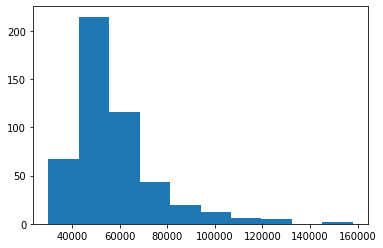

In [42]:
import matplotlib.pyplot as plt
plt.hist(df['min'], 10)

(array([ 62., 167., 136.,  68.,  28.,   9.,   6.,   6.,   2.,   2.]),
 array([ 50000.,  67300.,  84600., 101900., 119200., 136500., 153800.,
        171100., 188400., 205700., 223000.]),
 <a list of 10 Patch objects>)

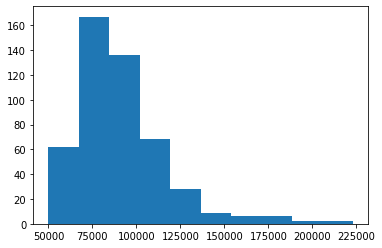

In [43]:
plt.hist(df['max'], 10)

In [65]:
with open('/Users/jz/token/mapbox.txt', 'r') as file:
    mapbox_token = file.read().replace('\n', '')

In [76]:
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

mapbox_access_token = mapbox_token

fig = go.Figure(go.Scattermapbox(
        lat=df['lat'],
        lon=df['lng'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9
        ),
        text=df['company'],
    ))

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=go.layout.Mapbox(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=go.layout.mapbox.Center(
            lat=40.7484,
            lon=-73.9857
        ),
        pitch=0,
        zoom=10
    ),
)

fig.show()
plot(fig, filename = 'filename.html', auto_open=False)

'filename.html'